In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
%matplotlib inline

In [5]:
def linearplot_with_confidence(x_list, mean_list, std_list, label, marker="", color='r'):
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

In [30]:
def get_final_all_values(algo, budgets, n_seed, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 
    perturb_final_visited_node_num_each_node = [] 


    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark3_rearr_result/benchmark3_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj(0)_flag({flag})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            perturb_final_visited_node_num_each_node.append(data_for_seed['final_visited_node_num_each_node'])
            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    result_all_values["visited_node_num_each_node"] = perturb_final_visited_node_num_each_node

    result_all_values["c"] = c_list

    return result_all_values 

def get_final_all_values_lst(algo, budgets, n_seed:list, obj_num, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 
    perturb_final_visited_node_num_each_node = [] 


    c_list = []
    for seed in n_seed:
        filename = f'benchmark3_rearr_result/benchmark3_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj(0)_flag({flag})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            # perturb_final_visited_node_num_each_node.append(data_for_seed['final_visited_node_num_each_node'])
            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    # result_all_values["visited_node_num_each_node"] = perturb_final_visited_node_num_each_node

    result_all_values["c"] = c_list

    return result_all_values 

def get_final_all_values_baseline(algo, budgets, n_seed, obj_num, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 
    perturb_final_visited_node_num_each_node = [] 


    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark3_rearr_result/benchmark3_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj(0)_flag({flag})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            # perturb_final_visited_node_num_each_node.append(data_for_seed['final_visited_node_num_each_node'])
            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    # result_all_values["visited_node_num_each_node"] = perturb_final_visited_node_num_each_node

    result_all_values["c"] = c_list

    return result_all_values 

def get_final_all_values_baseline_lst(algo, budgets, n_seed:list, obj_num, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 
    perturb_final_visited_node_num_each_node = [] 


    c_list = []
    for seed in n_seed:
        filename = f'benchmark3_rearr_result/benchmark3_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            # perturb_final_used_time.append(data_for_seed['final_used_time'])
            # perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            # perturb_final_visited_node_num_each_node.append(data_for_seed['final_visited_node_num_each_node'])
            # obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    # result_all_values["used_time"] = perturb_final_used_time
    # result_all_values["visted_node_num"] = perturb_final_visited_node_num
    # result_all_values["visited_node_num_each_node"] = perturb_final_visited_node_num_each_node
    result_all_values["c"] = c_list

    return result_all_values 

In [31]:
def plot_values(values, labels=None, title="test"):
    _, ax = p_utils.init_2d_figure(title)
    if labels.size > 1:
        for value, label in zip(values, labels):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)  
    else:
        for label, value in enumerate(values):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)
    # plt.ylim([np.min(values),np.max(values)])

In [32]:
def get_mean_std_values(result_all_values, level=1):
    if level == 1:
        key_name = "level_1_values"
    if level == 2:
        key_name = "level_2_values"
    mean_values = np.mean(result_all_values[key_name], axis=0)
    # mean_values = np.ma.masked_invalid(result_all_values[key_name]).mean(axis=0)
    std_values = np.std(result_all_values[key_name], axis=0)
    return mean_values, std_values

In [40]:
algo = "uct"
# result_all_values_flag_2_uct = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag=2,end_num =0)
seed_list = [1,2,3,4,5]
result_all_values_flag_2_uct = get_final_all_values_lst(algo, 100, n_seed = seed_list ,obj_num = 6, flag=2,end_num =0)
mean_level_1_values_flag_2_uct, std_level_1_values_flag_2_uct = get_mean_std_values(result_all_values_flag_2_uct, level=1)
mean_level_2_values_flag_2_uct, std_level_2_values_flag_2_uct = get_mean_std_values(result_all_values_flag_2_uct, level=2)

algo = "bai_ucb"
result_all_values_flag_2_bai_ucb = get_final_all_values_lst(algo, 100, n_seed =seed_list ,obj_num = 6, flag=2,end_num =0)
mean_level_1_values_flag_2_bai_ucb, std_level_1_values_flag_2_bai_ucb = get_mean_std_values(result_all_values_flag_2_bai_ucb, level=1)
mean_level_2_values_flag_2_bai_ucb, std_level_2_values_flag_2_bai_ucb = get_mean_std_values(result_all_values_flag_2_bai_ucb, level=2)

algo = "bai_perturb"
result_all_values_flag_2_bai_perturb = get_final_all_values_lst(algo, 100, n_seed =seed_list ,obj_num = 6, flag=2,end_num =0)
mean_level_1_values_flag_2_bai_perturb, std_level_1_values_flag_2_bai_perturb = get_mean_std_values(result_all_values_flag_2_bai_perturb, level=1)
mean_level_2_values_flag_2_bai_perturb, std_level_2_values_flag_2_bai_perturb = get_mean_std_values(result_all_values_flag_2_bai_perturb, level=2)


# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_2['c'])
# plot_values(perturb_mean_level_2_values_flag_2_uct, labels=bai_perturb_result_all_values_flag_2['c'])

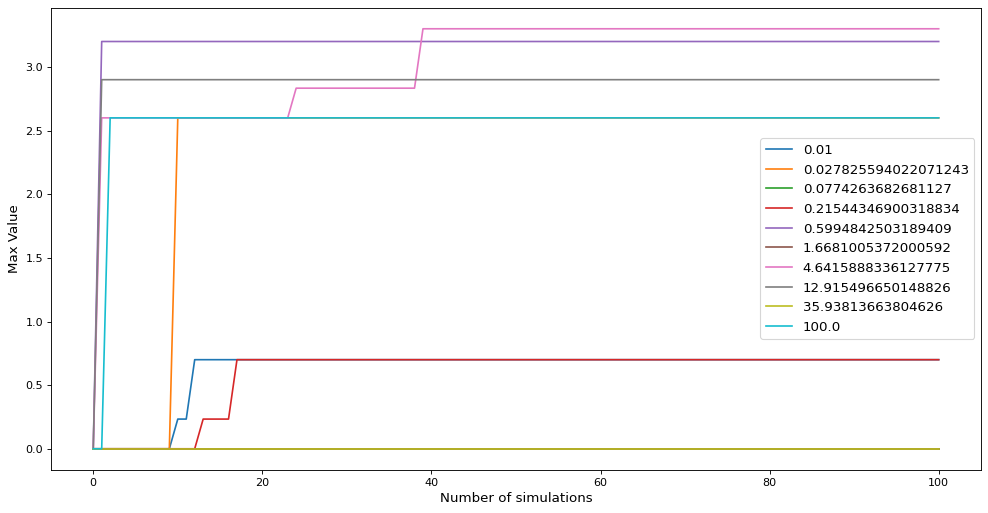

In [41]:
plot_values(mean_level_1_values_flag_2_uct, labels=result_all_values_flag_2_uct['c'])
# plot_values(mean_level_1_values_flag_2_bai_ucb, labels=result_all_values_flag_2_bai_ucb['c'])
# plot_values(mean_level_1_values_flag_2_bai_perturb, labels=result_all_values_flag_2_bai_perturb['c'])


In [42]:
algo = "uct"
# result_all_values_flag_1_uct = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
result_all_values_flag_1_uct = get_final_all_values_lst(algo, 100, n_seed =seed_list,obj_num = 6, flag = 1, end_num = 0)
mean_level_1_values_flag_1_uct, std_level_1_values_flag_1_uct = get_mean_std_values(result_all_values_flag_1_uct, level=1)
mean_level_2_values_flag_1_uct, std_level_2_values_flag_1_uct = get_mean_std_values(result_all_values_flag_1_uct, level=2)
# plot_values(mean_level_2_values_flag_1_uct, labels=result_all_values_flag_1_uct['c'])

algo = "bai_ucb"
# result_all_values_flag_1_bai_ucb = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
result_all_values_flag_1_bai_ucb = get_final_all_values_lst(algo, 100, n_seed =seed_list,obj_num = 6, flag = 1, end_num = 0)
mean_level_1_values_flag_1_bai_ucb, std_level_1_values_flag_1_bai_ucb = get_mean_std_values(result_all_values_flag_1_bai_ucb, level=1)
mean_level_2_values_flag_1_bai_ucb, std_level_2_values_flag_1_bai_ucb = get_mean_std_values(result_all_values_flag_1_bai_ucb, level=2)
# plot_values(mean_level_2_values_flag_1_bai_ucb, labels=result_all_values_flag_1_bai_ucb['c'])

algo = "bai_perturb"
# result_all_values_flag_1_bai_perturb = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
result_all_values_flag_1_bai_perturb = get_final_all_values_lst(algo, 100, n_seed = seed_list ,obj_num = 6, flag = 1, end_num = 0)
mean_level_1_values_flag_1_bai_perturb, std_level_1_values_flag_1_bai_perturb = get_mean_std_values(result_all_values_flag_1_bai_perturb, level=1)
mean_level_2_values_flag_1_bai_perturb, std_level_2_values_flag_1_bai_perturb = get_mean_std_values(result_all_values_flag_1_bai_perturb, level=2)
# plot_values(mean_level_2_values_flag_1_bai_perturb, labels=result_all_values_flag_1_bai_perturb['c'])


In [43]:
algo = "uct"
# result_all_values_flag_1_uct = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
result_all_values_flag_0_uct = get_final_all_values_baseline_lst(algo, 100, n_seed =seed_list,obj_num = 6, flag = 0, end_num = 0)
mean_level_1_values_flag_0_uct, std_level_1_values_flag_0_uct = get_mean_std_values(result_all_values_flag_0_uct, level=1)
mean_level_2_values_flag_0_uct, std_level_2_values_flag_0_uct = get_mean_std_values(result_all_values_flag_0_uct, level=2)
# plot_values(mean_level_2_values_flag_0_uct, labels=result_all_values_flag_0_uct['c'])

algo = "bai_ucb"
# result_all_values_flag_0_bai_ucb = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
result_all_values_flag_0_bai_ucb = get_final_all_values_baseline_lst(algo, 100, n_seed =seed_list,obj_num = 6, flag = 0, end_num = 0)
mean_level_1_values_flag_0_bai_ucb, std_level_1_values_flag_0_bai_ucb = get_mean_std_values(result_all_values_flag_0_bai_ucb, level=1)
mean_level_2_values_flag_0_bai_ucb, std_level_2_values_flag_0_bai_ucb = get_mean_std_values(result_all_values_flag_0_bai_ucb, level=2)
# plot_values(mean_level_2_values_flag_0_bai_ucb, labels=result_all_values_flag_0_bai_ucb['c'])

algo = "bai_perturb"
# result_all_values_flag_0_bai_perturb = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
result_all_values_flag_0_bai_perturb = get_final_all_values_baseline_lst(algo, 100, n_seed = seed_list ,obj_num = 6, flag = 0, end_num = 0)
mean_level_1_values_flag_0_bai_perturb, std_level_1_values_flag_0_bai_perturb = get_mean_std_values(result_all_values_flag_0_bai_perturb, level=1)
mean_level_2_values_flag_0_bai_perturb, std_level_2_values_flag_0_bai_perturb = get_mean_std_values(result_all_values_flag_0_bai_perturb, level=2)
# plot_values(mean_level_2_values_flag_1_bai_perturb, labels=result_all_values_flag_1_bai_perturb['c'])


## UCT level 1 plot 

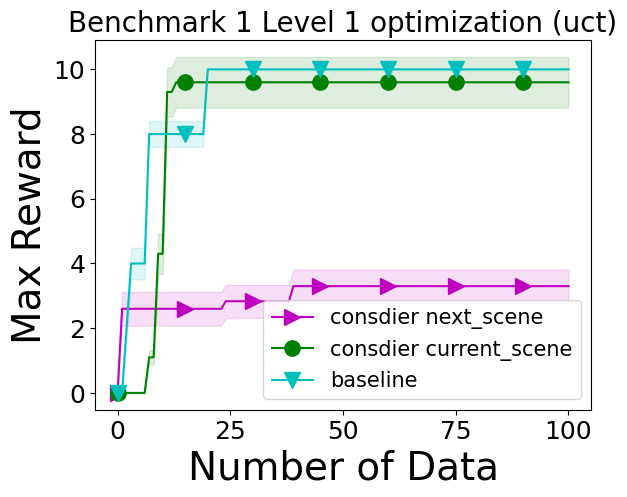

In [44]:
max_idx_flag_2_uct = np.argmax(mean_level_1_values_flag_2_uct[:, -1])
level_1_flag_2_mean_list_uct = mean_level_1_values_flag_2_uct[max_idx_flag_2_uct]
level_1_flag_2_std_list_uct = std_level_1_values_flag_2_uct[max_idx_flag_2_uct]

max_idx_flag_1_uct = np.argmax(std_level_1_values_flag_1_uct[:, -1])
level_1_flag_1_mean_list_uct = mean_level_1_values_flag_1_uct[max_idx_flag_1_uct]
level_1_flag_1_std_list_uct = std_level_1_values_flag_1_uct[max_idx_flag_1_uct]


max_idx_flag_0_uct = np.argmax(std_level_1_values_flag_0_uct[:, -1])
level_1_flag_0_mean_list_uct = mean_level_1_values_flag_0_uct[max_idx_flag_0_uct]
level_1_flag_0_std_list_uct = std_level_1_values_flag_0_uct[max_idx_flag_0_uct]


x_list = np.arange(len(level_1_flag_2_mean_list_uct))

linearplot_with_confidence(x_list, level_1_flag_2_mean_list_uct, level_1_flag_2_std_list_uct, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, level_1_flag_1_mean_list_uct, level_1_flag_1_std_list_uct, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, level_1_flag_0_mean_list_uct, level_1_flag_0_std_list_uct, "baseline", "v", "c")

plt.title("Benchmark 1 Level 1 optimization (uct)", fontsize=20)
plt.xlabel("Number of Data",fontsize=28)
plt.ylabel("Max Reward",fontsize=28)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
# plt.legend(loc='lower left', bbox_to_anchor=(0.5, 0.5), prop={'size' : 22})
plt.legend(loc='lower right', prop={'size' : 15})
plt.show()

## BAU-UCT level 1 plot 

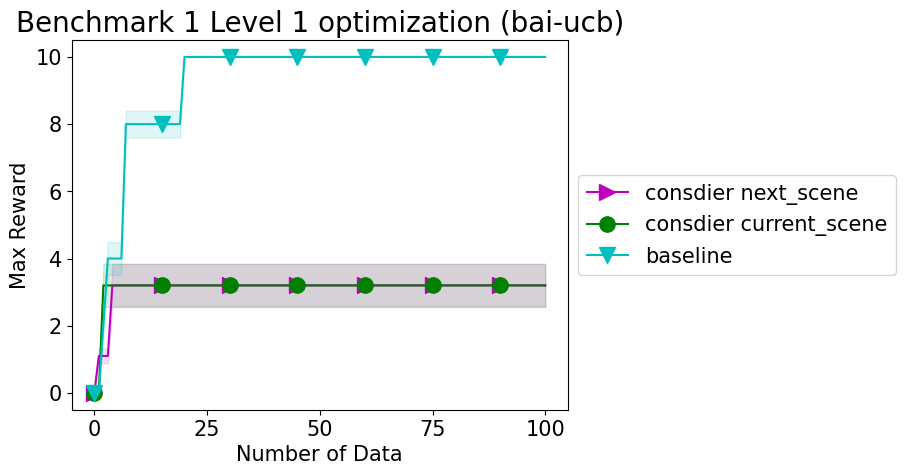

In [45]:
max_idx_flag_2_bai_ucb = np.argmax(mean_level_1_values_flag_2_bai_ucb[:, -1])
level_1_flag_2_mean_list_bai_ucb = mean_level_1_values_flag_2_bai_ucb[max_idx_flag_2_bai_ucb]
level_1_flag_2_std_list_bai_ucb = std_level_1_values_flag_2_bai_ucb[max_idx_flag_2_bai_ucb]

max_idx_flag_1_bai_ucb = np.argmax(std_level_1_values_flag_1_bai_ucb[:, -1])
level_1_flag_1_mean_list_bai_ucb = mean_level_1_values_flag_1_bai_ucb[max_idx_flag_1_bai_ucb]
level_1_flag_1_std_list_bai_ucb = std_level_1_values_flag_1_bai_ucb[max_idx_flag_1_bai_ucb]


max_idx_flag_0_bai_ucb = np.argmax(std_level_1_values_flag_0_bai_ucb[:, -1])
level_1_flag_0_mean_list_bai_ucb = mean_level_1_values_flag_0_bai_ucb[max_idx_flag_0_bai_ucb]
level_1_flag_0_std_list_bai_ucb = std_level_1_values_flag_0_bai_ucb[max_idx_flag_0_bai_ucb]


x_list = np.arange(len(level_1_flag_2_mean_list_bai_ucb))

linearplot_with_confidence(x_list, level_1_flag_2_mean_list_bai_ucb, level_1_flag_2_std_list_bai_ucb, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, level_1_flag_1_mean_list_bai_ucb, level_1_flag_1_std_list_bai_ucb, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, level_1_flag_0_mean_list_bai_ucb, level_1_flag_0_std_list_bai_ucb, "baseline", "v", "c")

plt.title("Benchmark 1 Level 1 optimization (bai-ucb)", fontsize=20)
plt.xlabel("Number of Data",fontsize=15)
plt.ylabel("Max Reward",fontsize=15)

plt.xticks(x_list[::25],x_list[::25],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 15})
plt.show()

## Bai-perturb level 1 plot 

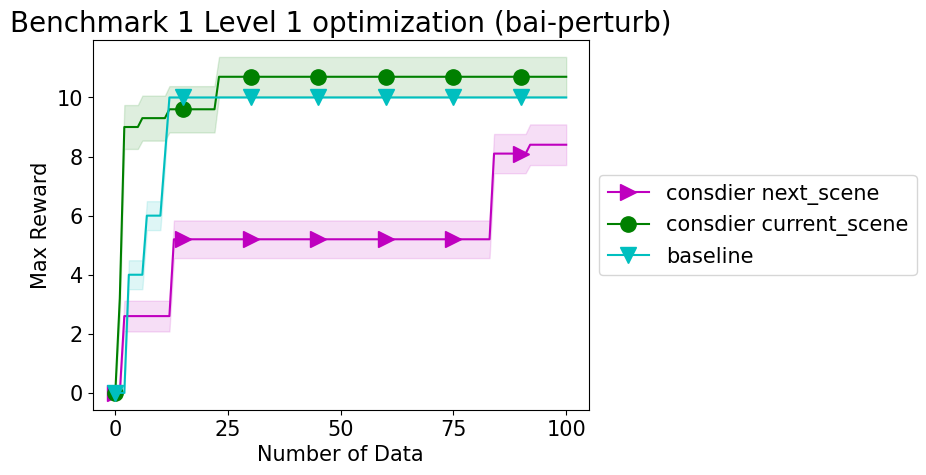

In [46]:
max_idx_flag_2_bai_perturb = np.argmax(mean_level_1_values_flag_2_bai_perturb[:, -1])
level_1_flag_2_mean_list_bai_perturb = mean_level_1_values_flag_2_bai_perturb[max_idx_flag_2_bai_perturb]
level_1_flag_2_std_list_bai_perturb = std_level_1_values_flag_2_bai_perturb[max_idx_flag_2_bai_perturb]

max_idx_flag_1_bai_perturb = np.argmax(std_level_1_values_flag_1_bai_perturb[:, -1])
level_1_flag_1_mean_list_bai_perturb = mean_level_1_values_flag_1_bai_perturb[max_idx_flag_1_bai_perturb]
level_1_flag_1_std_list_bai_perturb = std_level_1_values_flag_1_bai_perturb[max_idx_flag_1_bai_perturb]


max_idx_flag_0_bai_perturb = np.argmax(std_level_1_values_flag_0_bai_perturb[:, -1])
level_1_flag_0_mean_list_bai_perturb = mean_level_1_values_flag_0_bai_perturb[max_idx_flag_0_bai_perturb]
level_1_flag_0_std_list_bai_perturb = std_level_1_values_flag_0_bai_perturb[max_idx_flag_0_bai_perturb]


x_list = np.arange(len(level_1_flag_2_mean_list_bai_perturb))

linearplot_with_confidence(x_list, level_1_flag_2_mean_list_bai_perturb, level_1_flag_2_std_list_bai_perturb, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, level_1_flag_1_mean_list_bai_perturb, level_1_flag_1_std_list_bai_perturb, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, level_1_flag_0_mean_list_bai_perturb, level_1_flag_0_std_list_bai_perturb, "baseline", "v", "c")

plt.title("Benchmark 1 Level 1 optimization (bai-perturb)", fontsize=20)
plt.xlabel("Number of Data",fontsize=15)
plt.ylabel("Max Reward",fontsize=15)

plt.xticks(x_list[::25],x_list[::25],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 15})
plt.show()

## UCT level 2 plot

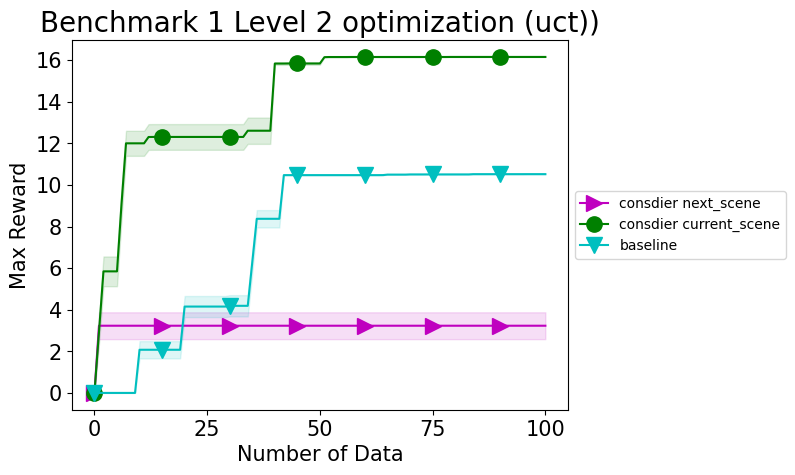

In [47]:
max_idx_flag_2_uct = np.argmax(mean_level_2_values_flag_2_uct[:, -1])
level_2_flag_2_mean_list_uct = mean_level_2_values_flag_2_uct[max_idx_flag_2_uct]
level_2_flag_2_std_list_uct = std_level_2_values_flag_2_uct[max_idx_flag_2_uct]

max_idx_flag_1_uct = np.argmax(mean_level_2_values_flag_1_uct[:, -1])
level_2_flag_1_mean_list_uct = mean_level_2_values_flag_1_uct[max_idx_flag_1_uct]
level_2_flag_1_std_list_uct = std_level_2_values_flag_1_uct[max_idx_flag_1_uct]

max_idx_flag_0_uct = np.argmax(mean_level_2_values_flag_0_uct[:, -1])
level_2_flag_0_mean_list_uct = mean_level_2_values_flag_0_uct[max_idx_flag_0_uct]
level_2_flag_0_std_list_uct = std_level_2_values_flag_0_uct[max_idx_flag_0_uct]

x_list = np.arange(len(level_2_flag_2_mean_list_uct))

linearplot_with_confidence(x_list, level_2_flag_2_mean_list_uct, level_2_flag_2_std_list_uct, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, level_2_flag_1_mean_list_uct, level_2_flag_1_std_list_uct, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, level_2_flag_0_mean_list_uct, level_2_flag_0_std_list_uct, "baseline", "v", "c")

plt.title("Benchmark 1 Level 2 optimization (uct))", fontsize=20)
plt.xlabel("Number of Data",fontsize=15)
plt.ylabel("Max Reward",fontsize=15)

plt.xticks(x_list[::25],x_list[::25],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 10})
plt.show()


## Bai-ucb level 2 plot 

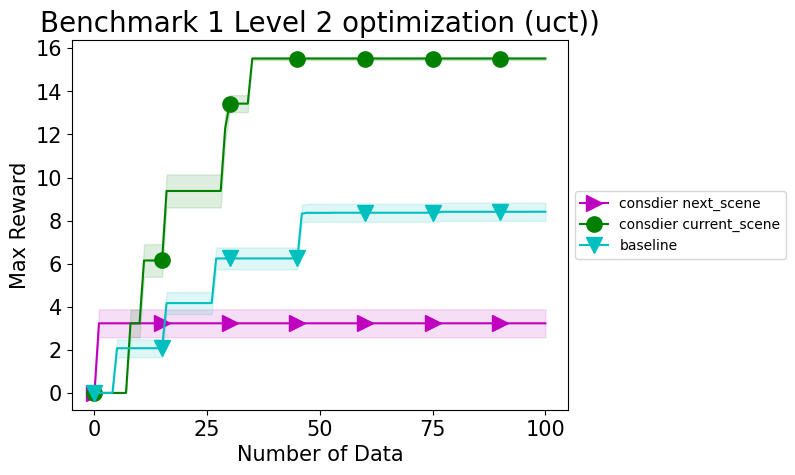

In [48]:
max_idx_flag_2_bai_ucb = np.argmax(mean_level_2_values_flag_2_bai_ucb[:, -1])
level_2_flag_2_mean_list_bai_ucb = mean_level_2_values_flag_2_bai_ucb[max_idx_flag_2_bai_ucb]
level_2_flag_2_std_list_bai_ucb = std_level_2_values_flag_2_bai_ucb[max_idx_flag_2_bai_ucb]

max_idx_flag_1_bai_ucb = np.argmax(mean_level_2_values_flag_1_bai_ucb[:, -1])
level_2_flag_1_mean_list_bai_ucb = mean_level_2_values_flag_1_bai_ucb[max_idx_flag_1_bai_ucb]
level_2_flag_1_std_list_bai_ucb = std_level_2_values_flag_1_bai_ucb[max_idx_flag_1_bai_ucb]

max_idx_flag_0_bai_ucb = np.argmax(mean_level_2_values_flag_0_bai_ucb[:, -1])
level_2_flag_0_mean_list_bai_ucb = mean_level_2_values_flag_0_bai_ucb[max_idx_flag_0_bai_ucb]
level_2_flag_0_std_list_bai_ucb = std_level_2_values_flag_0_bai_ucb[max_idx_flag_0_bai_ucb]

x_list = np.arange(len(level_2_flag_2_mean_list_bai_ucb))

linearplot_with_confidence(x_list, level_2_flag_2_mean_list_bai_ucb, level_2_flag_2_std_list_bai_ucb, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, level_2_flag_1_mean_list_bai_ucb, level_2_flag_1_std_list_bai_ucb, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, level_2_flag_0_mean_list_bai_ucb, level_2_flag_0_std_list_bai_ucb, "baseline", "v", "c")

plt.title("Benchmark 1 Level 2 optimization (uct))", fontsize=20)
plt.xlabel("Number of Data",fontsize=15)
plt.ylabel("Max Reward",fontsize=15)

plt.xticks(x_list[::25],x_list[::25],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 10})
plt.show()

## Bai-perturb level 2 plot 

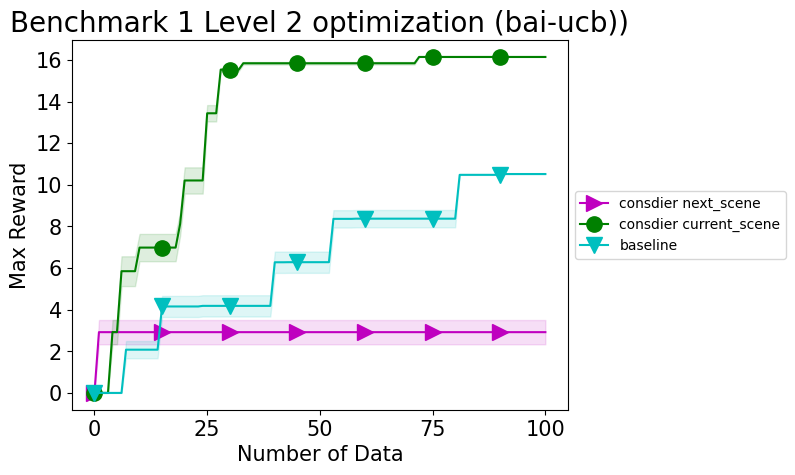

In [49]:
max_idx_flag_2_bai_perturb = np.argmax(mean_level_2_values_flag_2_bai_perturb[:, -1])
level_2_flag_2_mean_list_bai_perturb = mean_level_2_values_flag_2_bai_perturb[max_idx_flag_2_bai_perturb]
level_2_flag_2_std_list_bai_perturb = std_level_2_values_flag_2_bai_perturb[max_idx_flag_2_bai_perturb]

max_idx_flag_1_bai_perturb = np.argmax(mean_level_2_values_flag_1_bai_perturb[:, -1])
level_2_flag_1_mean_list_bai_perturb = mean_level_2_values_flag_1_bai_perturb[max_idx_flag_1_bai_perturb]
level_2_flag_1_std_list_bai_perturb = std_level_2_values_flag_1_bai_perturb[max_idx_flag_1_bai_perturb]

max_idx_flag_0_bai_perturb = np.argmax(mean_level_2_values_flag_0_bai_perturb[:, -1])
level_2_flag_0_mean_list_bai_perturb = mean_level_2_values_flag_0_bai_perturb[max_idx_flag_0_bai_perturb]
level_2_flag_0_std_list_bai_perturb = std_level_2_values_flag_0_bai_perturb[max_idx_flag_0_bai_perturb]

x_list = np.arange(len(level_2_flag_2_mean_list_bai_perturb))

linearplot_with_confidence(x_list, level_2_flag_2_mean_list_bai_perturb, level_2_flag_2_std_list_bai_perturb, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, level_2_flag_1_mean_list_bai_perturb, level_2_flag_1_std_list_bai_perturb, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, level_2_flag_0_mean_list_bai_perturb, level_2_flag_0_std_list_bai_perturb, "baseline", "v", "c")


plt.title("Benchmark 1 Level 2 optimization (bai-ucb))", fontsize=20)
plt.xlabel("Number of Data",fontsize=15)
plt.ylabel("Max Reward",fontsize=15)

plt.xticks(x_list[::25],x_list[::25],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 10})
plt.show()

# time consuming check 

In [ ]:
def get_time_used_mean(used_time_data):
    level_1_time = 0 
    level_1_5_time = 0
    level_2_time = 0
    count = 0 
    for data in used_time_data:
        for i in data:
            if i:
                count += 1 
                level_1_time += i[0]
                level_1_5_time += i[1]
                level_2_time += i[2] 
    
    return level_1_time/count, level_1_5_time/count, level_2_time/count


In [ ]:
used_time_flag_2_uct = get_time_used_mean(result_all_values_flag_2_uct['used_time'])
used_time_flag_1_uct = get_time_used_mean(result_all_values_flag_1_uct['used_time'])
used_time_flag_0_uct = get_time_used_mean(result_all_values_flag_0_uct['used_time'])

used_time_flag_2_bai_ucb = get_time_used_mean(result_all_values_flag_2_bai_ucb['used_time'])
used_time_flag_1_bai_ucb = get_time_used_mean(result_all_values_flag_1_bai_ucb['used_time'])
used_time_flag_0_bai_ucb = get_time_used_mean(result_all_values_flag_0_bai_ucb['used_time'])

used_time_flag_2_bai_perturb = get_time_used_mean(result_all_values_flag_2_bai_perturb['used_time'])
used_time_flag_1_bai_perturb = get_time_used_mean(result_all_values_flag_1_bai_perturb['used_time'])
used_time_flag_0_bai_perturb = get_time_used_mean(result_all_values_flag_0_bai_perturb['used_time'])

/tmp/ipykernel_901415/1439130670.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if i:


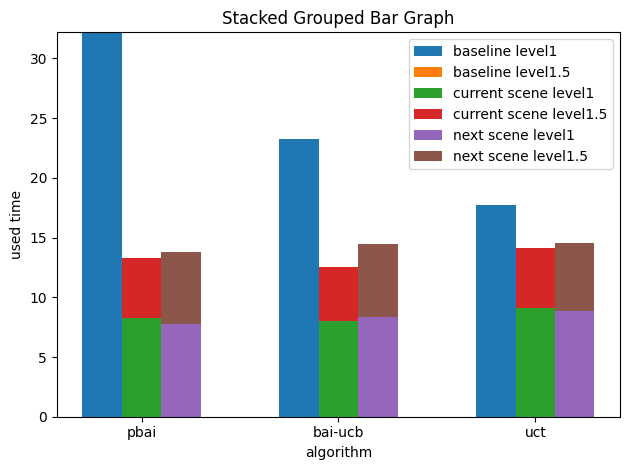

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
categories = ['pbai', 'bai-ucb', 'uct']
group_labels_level_1 = ['baseline level1', 'current scene level1' ,'next scene level1']  # 그룹 레이블
group_labels_level_1_5 = ['baseline level1.5', 'current scene level1.5' ,'next scene level1.5']  # 그룹 레이블

group_values_level_1 = [
    [used_time_flag_0_uct[0], used_time_flag_0_bai_ucb[0], used_time_flag_0_bai_perturb[0]],  # flag 0에 대한 알고리즘 별 level 1값 
    [used_time_flag_1_uct[0], used_time_flag_1_bai_ucb[0], used_time_flag_1_bai_perturb[0]],  # flag 1에 대한 알고리즘 별 level 1값 
    [used_time_flag_2_uct[0], used_time_flag_2_bai_ucb[0], used_time_flag_2_bai_perturb[0]]   # flag 2에 대한 알고리즘 별 level 1값 
]
group_values_level_1_5 = [
    [used_time_flag_0_uct[1], used_time_flag_0_bai_ucb[1], used_time_flag_0_bai_perturb[1]],  # flag 0에 대한 알고리즘 별 level 1.5값 
    [used_time_flag_1_uct[1], used_time_flag_1_bai_ucb[1], used_time_flag_1_bai_perturb[1]],  # flag 1에 대한 알고리즘 별 level 1.5값 
    [used_time_flag_2_uct[1], used_time_flag_2_bai_ucb[1], used_time_flag_2_bai_perturb[1]]   # flag 2에 대한 알고리즘 별 level 1.5값 
]

# 스택 쌓은 막대 그래프 그리기
bar_width = 0.2  # 막대 너비 설정
num_categories = len(categories)
x = np.arange(num_categories)  # x 축 위치 설정

fig, ax = plt.subplots()

bottom = np.zeros(num_categories)  # 막대 바닥 위치 초기화
# for i, group_data in enumerate(group_values_level_1):
ax.bar(x + 0 * bar_width, group_values_level_1[0], bar_width, label=group_labels_level_1[0])
bottom += group_values_level_1[0]  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌
ax.bar(x + 0 * bar_width, group_values_level_1_5[0], bar_width, label=group_labels_level_1_5[0], bottom=bottom)

# for i, group_data in enumerate(group_values_level_1):
bottom = np.zeros(num_categories)  # 막대 바닥 위치 초기화
ax.bar(x + 1 * bar_width, group_values_level_1[1], bar_width, label=group_labels_level_1[1])
bottom += group_values_level_1[1]  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌
ax.bar(x + 1 * bar_width, group_values_level_1_5[1], bar_width, label=group_labels_level_1_5[1], bottom=bottom)

# for i, group_data in enumerate(group_values_level_1):
bottom = np.zeros(num_categories)  # 막대 바닥 위치 초기화
ax.bar(x + 2 * bar_width, group_values_level_1[2], bar_width, label=group_labels_level_1[2])
bottom += group_values_level_1[2]  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌
ax.bar(x + 2 * bar_width, group_values_level_1_5[2], bar_width, label=group_labels_level_1_5[2], bottom=bottom)



# bottom += group_data  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌

# for i, group_data in enumerate(group_values_level_1_5):
#     ax.bar(x + i * bar_width, group_data, bar_width, label=group_labels_level_1_5[i], bottom=bottom)


ax.set_xticks(x + bar_width * (len(group_values_level_1) - 1) / 2)
ax.set_xticklabels(categories)
ax.set_xlabel('algorithm')
ax.set_ylabel('used time')
ax.set_title('Stacked Grouped Bar Graph')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
group_values_level_1[0], group_values_level_1[1], group_values_level_1[2]

([32.18154125947218, 23.2546325646914, 17.72554624781889],
 [8.288588451960731, 7.991376287596566, 9.080659094064131],
 [7.764088929494222, 8.387672740421937, 8.821134156302401])

# Visited node count 

In [ ]:
### flag 2
uct_visited_node_flag_2 = result_all_values_flag_2_uct['visted_node_num']
uct_visited_node_each_depth_flag_2 = result_all_values_flag_2_uct['visited_node_num_each_node']

bai_ucb_visited_node_flag_2 = result_all_values_flag_2_bai_ucb['visted_node_num']
bai_ucb_visited_node_each_depth_flag_2 = result_all_values_flag_2_bai_ucb['visited_node_num_each_node']

bai_perturb_visited_node_flag_2 = result_all_values_flag_2_bai_perturb['visted_node_num']
bai_perturb_visited_node_each_depth_flag_2 = result_all_values_flag_2_bai_perturb['visited_node_num_each_node']

### flag 1 
uct_visited_node_flag_1 = result_all_values_flag_1_uct['visted_node_num']
uct_visited_node_each_depth_flag_1 = result_all_values_flag_1_uct['visited_node_num_each_node']

bai_ucb_visited_node_flag_1 = result_all_values_flag_1_bai_ucb['visted_node_num']
bai_ucb_visited_node_each_depth_flag_1 = result_all_values_flag_1_bai_ucb['visited_node_num_each_node']

bai_perturb_visited_node_flag_1 = result_all_values_flag_1_bai_perturb['visted_node_num']
bai_perturb_visited_node_each_depth_flag_1 = result_all_values_flag_1_bai_perturb['visited_node_num_each_node']